In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns 

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.application import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.metrics import Accuracy 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, rescale = 1./255, validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [5]:
train_dir = r"C:\Users\amrit\Emotion Detector\emotion\train"
test_dir = r"C:\Users\amrit\Emotion Detector\emotion\test"

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(img_size, img_size), batch_size=64, color_mode="grayscale", class_mode="categorical", subset="training")
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size=(img_size, img_size), batch_size=64, color_mode="grayscale", class_mode="categorical", subset="validation")


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile( optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\amrit\OneDrive\Desktop\tf-kernal\tf-kernal\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
epochs = 30
batch_size = 256

In [8]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/30


C:\Users\amrit\OneDrive\Desktop\tf-kernal\tf-kernal\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.1776 - loss: 9.6277 - val_accuracy: 0.2291 - val_loss: 8.6289
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.2218 - loss: 8.5268 - val_accuracy: 0.2772 - val_loss: 7.5913
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.2465 - loss: 7.5639 - val_accuracy: 0.3038 - val_loss: 6.6074
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.2794 - loss: 6.5719 - val_accuracy: 0.3589 - val_loss: 5.6688
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.3089 - loss: 5.6585 - val_accuracy: 0.3135 - val_loss: 5.2334
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.3317 - loss: 4.8832 - val_accuracy: 0.3380 - val_loss: 4.3554
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 405s 1s/step - accuracy: 0.3558 - loss: 4.2038 - val_accuracy: 0.3897 - val_loss: 3.7597
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - accuracy: 0.3772 - loss: 3.6582 - val_accuracy: 0.414

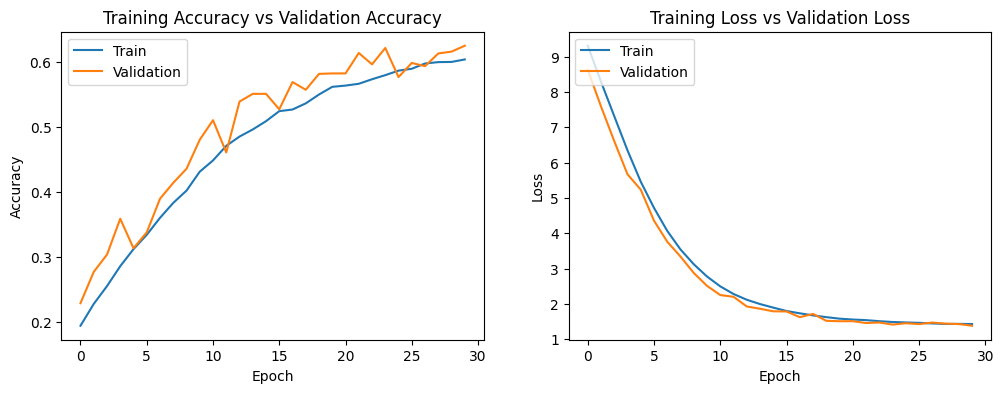

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [10]:
# model.save('model_optimal.h5') 

(48, 48)


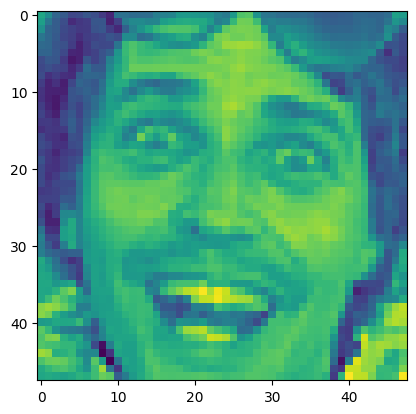

In [11]:
img = image.load_img("./emotion/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [12]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [13]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
[0.0, 0.0, 4.043666e-31, 1.4337432e-19, 0.0, 0.0, 1.0]


In [14]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


In [15]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)

359/359 ━━━━━━━━━━━━━━━━━━━━ 130s 363ms/step - accuracy: 0.6363 - loss: 1.3269
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.6300 - loss: 1.3747


In [16]:
model.save_weights('model_weights.weights.h5')